# Ejemple: Segmentación de Mercados

## Importar bilbiotecas

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

## Cargar los datos

In [15]:
data = pd.read_csv ('Cluster Example.csv')
data[:5]

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


Satisfaction: Se le pide al cliente que evalúe su experiencia de compra. Los datos son discretos en un rango de 1 a 10
<br>
Lealtad: Hay varios metodos para medir la lealtad de un cliente, como son chorn rate, retantion rate, customer lifetime value (CLV).
<br>
En este caso la leatad se mido usando el número de compras durante un año y otros factores. Los datos son continuos en un rango de -2.5 a 2.5

## Graficamos los datos

Text(0,0.5,'Loyalty')

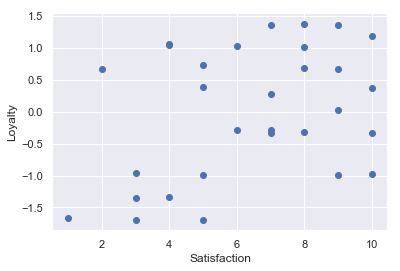

In [16]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Seleccionar variables

In [17]:
x = data.copy()

## Clustering

In [18]:
# Creamos un objeto tipo Kmeans con 2 cluters
kmeans = KMeans(2)
# Ajustamos los datos
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [19]:
clusters = x.copy()
#Agregamos una nueva columna con los clusters  
clusters['cluster_pred']=kmeans.fit_predict(x)
clusters[:5]

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,0
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,0


Text(0,0.5,'Loyalty')

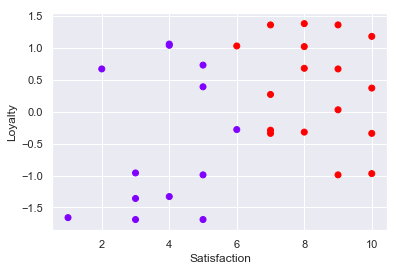

In [20]:
# Graficamos los datos 
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

La división de los clusters esta en Satisfaction=6
<br>
El algoritmo unicamente esta considerando la variable Satisfaction porque los datos no estan estandarizados.
<br>
Los valores de Satisfaction son muho mas grandes que los valores de Loyalty.

## Estandarizando las variables

In [21]:
from sklearn import preprocessing
# Escalamos las entradas 
# preprocessing.scale escala cada columna consigo misma 
# el resultado es un arreglo
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Usamos el método Elbow

In [26]:
# Creamos una lista vacia
wcss =[]

# Creamos todas las posibles soluciones 
# de 1 a 9 clusters 
for i in range(1,10):
    # Solucion con i clusters
    kmeans = KMeans(i)
    # Ajustamos los datos estandarizados
    kmeans.fit(x_scaled)
    # Guardamos el resultado
    wcss.append(kmeans.inertia_)
    
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.618560114942934,
 5.554909393634164,
 4.453263690150964,
 3.7799886162052663]

Text(0,0.5,'WCSS')

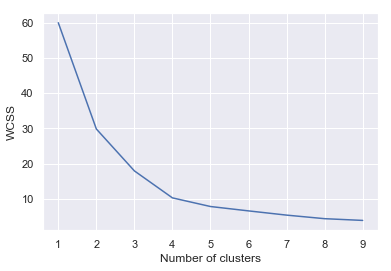

In [23]:
# Graficamos el numero de clusters vs WCSS
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Seleccionamos el número de clusters

In [28]:
# Fiddle with K (the number of clusters)
kmeans_new = KMeans(4)
# Fit the data
kmeans_new.fit(x_scaled)
# Create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,3
2,5,-0.99,1
3,7,-0.29,3
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,0
9,8,0.68,0


Debemos tener cuidado. Las columnas Satisfaction y Loyalty son datos reales, mientras que la solución da resultados con datos estandarizados

Text(0,0.5,'Loyalty')

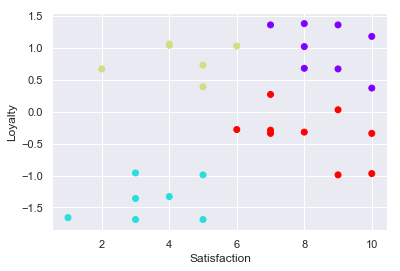

In [29]:
# Plot
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')